#PART 1

1. Import the libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Import the csv file 'Survey.csv' into df

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Survey.csv')

column_names = df.columns
print(column_names)

Index(['Timestamp', 'Name', 'Age', 'Sex', 'Cell', 'From Bulacan',
       'Extended Family', 'Household Size', 'Students in Household',
       'Bill Contributors', 'Monthly Household Salary',
       'Other Financial Assistance', 'Monthly Electric Budget',
       'Owned Appliances', 'Month A', 'Month B', 'Month C', 'Amount',
       'Frequency', 'Number of Students in Household', 'Electronics Owned',
       'Struggle Paying Electric Bill', 'Failure Paying Electric Bill'],
      dtype='object')


3. Connect to a database, name the database 'Survey_Database.db'

In [3]:
conn = sqlite3.connect('Survey_Database.db')

4. Add your dataframe to the database. Name the table 'Initial_Table'

In [4]:
# Add DataFrame to the database with table name 'Initial_Table'
df.to_sql('Initial_Table', conn, if_exists='replace', index=False)

116

5. Check column names

In [5]:
query2 = "PRAGMA table_info('Initial_table');"
columns = pd.read_sql_query(query2, conn)
columns

,cid,name,type,notnull,dflt_value,pk
0,0,Timestamp,TEXT,0,None,0
1,1,Name,REAL,0,None,0
2,2,Age,REAL,0,None,0
3,3,Sex,TEXT,0,None,0
4,4,Cell,REAL,0,None,0
5,5,From Bulacan,TEXT,0,None,0
6,6,Extended Family,TEXT,0,None,0
7,7,Household Size,REAL,0,None,0
8,8,Students in Household,TEXT,0,None,0
9,9,Bill Contributors,REAL,0,None,0


6. Query: Make a table 'Initial_Table2' without the columns, timestamp, name, mobile number.

In [6]:
# Create a cursor object Need this otherwise NameError: name 'cursor' is not defined
cursor = conn.cursor()

# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS Initial_Table2")

# Create a new table 'Initial_Table2' as a copy of 'Initial_Table'
cursor.execute("CREATE TABLE Initial_Table2 AS SELECT * FROM Initial_Table")

# Drop the specified columns from 'Initial_Table2' if they exist
cursor.execute("ALTER TABLE Initial_Table2 DROP COLUMN Timestamp")
cursor.execute("ALTER TABLE Initial_Table2 DROP COLUMN Name")
cursor.execute("ALTER TABLE Initial_Table2 DROP COLUMN Cell")


In [7]:
# Fetch the column names of the 'Initial_Table2' table
query2 = "PRAGMA table_info('Initial_Table2');"
columns = pd.read_sql_query(query2, conn)
print(columns.to_string(index=False))

 cid                            name type  notnull dflt_value  pk
   0                             Age REAL        0       None   0
   1                             Sex TEXT        0       None   0
   2                    From Bulacan TEXT        0       None   0
   3                 Extended Family TEXT        0       None   0
   4                  Household Size REAL        0       None   0
   5           Students in Household TEXT        0       None   0
   6               Bill Contributors REAL        0       None   0
   7        Monthly Household Salary TEXT        0       None   0
   8      Other Financial Assistance TEXT        0       None   0
   9         Monthly Electric Budget REAL        0       None   0
  10                Owned Appliances TEXT        0       None   0
  11                         Month A REAL        0       None   0
  12                         Month B  INT        0       None   0
  13                         Month C  INT        0       None   0
  14      

Note: this will not work the same as when we store a query result in a variable, it will give you the 'int' object has no attribute 'to_sql'

Instead, we have to store a query result in a variable to be able to call it to sql

Now we have a variable Initial_Table 2, we then store it in the table Initial_Table2

Checking existing tables

In [8]:
# Fetch existing table names
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()

# Print the table names
for table in tables:
    print(table[0])


Initial_Table
Initial_Table2


7. Query: Only retrieve data of respondents from Bulacan.

In [10]:
# Query to retrieve data of respondents from Bulacan
query = "SELECT * FROM Initial_Table2 WHERE [From Bulacan] = 'Yes'"

# Execute the query
bulacan_respondents = pd.read_sql_query(query, conn)
print(bulacan_respondents)

       Age     Sex From Bulacan Extended Family  Household Size  \
0     21.0    Male          Yes              No             5.0   
1     20.0    Male          Yes              No             3.0   
2     21.0    Male          Yes              No             5.0   
3     20.0    Male          Yes              No             6.0   
4     20.0  Female          Yes              No             4.0   
..     ...     ...          ...             ...             ...   
107   22.0  Female          Yes             Yes             3.0   
108   22.0  Female          Yes             Yes             6.0   
109  151.0  Female          Yes             Yes             7.0   
110    2.0  Female          Yes              No             7.0   
111    NaN    Male          Yes              No             3.0   

    Students in Household  Bill Contributors  \
0                     Yes                2.0   
1                     Yes                3.0   
2                     Yes                3.0   
3  

8. Make a table from the query in item 7, call it 'Main_Table'

In [11]:
# Create a new table 'Main_Table' with the query result
bulacan_respondents.to_sql('Main_Table', conn, if_exists='replace', index=False)

# Verify the creation by fetching and displaying the table
verify_query = "SELECT * FROM Main_Table"
main_table = pd.read_sql_query(verify_query, conn)

# To see the column names
print(main_table.columns)

Index(['Age', 'Sex', 'From Bulacan', 'Extended Family', 'Household Size',
       'Students in Household', 'Bill Contributors',
       'Monthly Household Salary', 'Other Financial Assistance',
       'Monthly Electric Budget', 'Owned Appliances', 'Month A', 'Month B',
       'Month C', 'Amount', 'Frequency', 'Number of Students in Household',
       'Electronics Owned', 'Struggle Paying Electric Bill',
       'Failure Paying Electric Bill'],
      dtype='object')


In [12]:
# Close the connection when done
conn.close()

9. Query: Retrieve responses with students in household

In [13]:
# Connect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve responses with students in the household
sql_query = '''
SELECT * FROM Main_Table
WHERE [Students in Household] = 'Yes';
'''

# Execute the query and fetch the results into a DataFrame
students_in_household_df = pd.read_sql_query(sql_query, conn)

# Close the connection before creating a new table
conn.close()

10. Make a table from the Query in item 9. Call it 'With_Students'

In [14]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Create a new table 'With_Students' from the query result
students_in_household_df.to_sql('With_Students', conn, if_exists='replace', index=False)

print("Table 'With_Students' has been created from the query result.")

Table 'With_Students' has been created from the query result.


11. Query: Retrieve responses from table 'With_Students' where students have at least a Laptop or a Desktop COmputer

In [15]:
query = "SELECT * FROM With_Students WHERE [Electronics Owned] LIKE '%Laptop%' OR [Electronics Owned] LIKE '%Desktop Computer%'"
students_with_devices = pd.read_sql_query(query, conn)


12. Show the existing tables in the current database.

In [16]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)


             name
0   Initial_Table
1  Initial_Table2
2      Main_Table
3   With_Students


13. Close the connection

In [17]:
conn.close()


14. Call the database again, verify if we have the new tables.

In [18]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Verify if the new tables exist
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)

             name
0   Initial_Table
1  Initial_Table2
2      Main_Table
3   With_Students


15. Drop both of the Initial Tables

In [19]:
# Drop the Initial_Table and Initial_Table2 tables if they exist
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS Initial_Table")
cursor.execute("DROP TABLE IF EXISTS Initial_Table2")

# Verify if the tables are dropped by checking existing tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)



            name
0     Main_Table
1  With_Students


#PART 2

## OUR CONCLUSION SHOUD REVOLVE AROUND THE LOW INCOME HOUSEHOLDS EARNING LESS THAN PHP 21,194.

###1. FILTERING QUALIFIED RESPONDENTS

a. Query_Sample: Only retrieve respondents who belongs to the low income households. Use Main_Table

In [20]:
# Define the query to retrieve salary per month from Main_Table
query = """
SELECT [Monthly Household Salary]
FROM Main_Table
"""

# Execute the query
salary_per_month = pd.read_sql_query(query, conn)

# Display the results
print(salary_per_month)

               Monthly Household Salary
0    Between Php 21,194 and Php 43, 828
1    Between Php 21,194 and Php 43, 828
2                  Less than Php 21,194
3                  Less than Php 21,194
4                  Less than Php 21,194
..                                  ...
107                Less than Php 21,194
108  Between Php 21,194 and Php 43, 828
109                Less than Php 21,194
110                Less than Php 21,194
111                Less than Php 21,194

[112 rows x 1 columns]


In [21]:
# Define the SQL query to retrieve low-income respondents from Main_Table
query = """
SELECT *
FROM Main_Table
WHERE [Monthly Household Salary] LIKE 'Less than Php 21,194%'
"""

# Execute the query
low_income_respondents = pd.read_sql_query(query, conn)

b. Make a table and call it 'sample' <br><br>
*--- > a "sample" refers to a subset of individuals or elements from a larger population that is selected for study.*

In [22]:
# Save the DataFrame 'low_income_respondents' as a table named 'sample'
low_income_respondents.to_sql('sample', conn, if_exists='replace', index=False)


58

###2. Average Bill

a. Query_avg_bill: Add a column in sample, call it "avg_bill" and get the average of month a, month b, month c columns. Retrieve ALL information including the new column.

In [23]:
# Calculate the average of month a, month b, and month c columns but what if it has missing values or NaN
# Can use numpy.nanmean() to calculate mean of array, ignoring NaN values
import numpy as np

# Calculate the average of Month A, Month B, and Month C columns, handling missing values or NaN
avg_bill = np.nanmean(low_income_respondents[["Month A", "Month B", "Month C"]], axis=1)

# Add the 'avg_bill' column to the DataFrame
low_income_respondents["avg_bill"] = avg_bill

b. Store the information we retrieved to our updated table, call it 'final_sample'

In [24]:
# Store the updated DataFrame as a new table named 'final_sample'
low_income_respondents.to_sql('final_sample', conn, if_exists='replace', index=False)


58

c. We can now drop columns Month A, Month B, and Month C.

In [25]:
# Define the SQL query to drop columns
query_drop_columns = """
ALTER TABLE final_sample
DROP COLUMN 'Month A';
ALTER TABLE final_sample
DROP COLUMN 'Month B';
ALTER TABLE final_sample
DROP COLUMN 'Month C';
"""

# Execute the query to drop columns
cursor.executescript(query_drop_columns)

# Commit the changes
conn.commit()

d. final_sample: Retrieve all the information in final_sample to verify the column drops.

In [26]:
# Define the SQL query to retrieve all information from final_sample
query_final_sample = """
SELECT *
FROM final_sample;
"""

# Execute the query
final_sample_info = pd.read_sql_query(query_final_sample, conn)

# Get the column names of the final_sample_info DataFrame
columns = final_sample_info.columns

# Print the column names
print(columns)


Index(['Age', 'Sex', 'From Bulacan', 'Extended Family', 'Household Size',
       'Students in Household', 'Bill Contributors',
       'Monthly Household Salary', 'Other Financial Assistance',
       'Monthly Electric Budget', 'Owned Appliances', 'Amount', 'Frequency',
       'Number of Students in Household', 'Electronics Owned',
       'Struggle Paying Electric Bill', 'Failure Paying Electric Bill',
       'avg_bill'],
      dtype='object')


##Deriving Conclusions from final_sample

FIRST!! close the connection, we will use python for the rest of the conclusions.

In [27]:
# Close the connection
conn.close()

ANSWER THE FOLLOWING QUESTIONS: <br>
use python through 'final_sample' dataframe we made a while ago

###3. Extended family

a. How many low income households live with extended family?

In [28]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to count households living with extended family from 'final_sample'
query_count_extended_family = """
SELECT COUNT(*)
FROM final_sample
WHERE [Extended Family] = 'Yes'
"""

# Execute the query
result = pd.read_sql_query(query_count_extended_family, conn)

# Print the count [0, is row index and 0] is column index; It's value at top left corner of DataFrame result which is sum of count
print("Number of low income households living with extended family:", result.iloc[0, 0])

Number of low income households living with extended family: 23


b. Make a pie chart showing the difference between the households living with extended family and those who do not. (ONLY PYTHON)

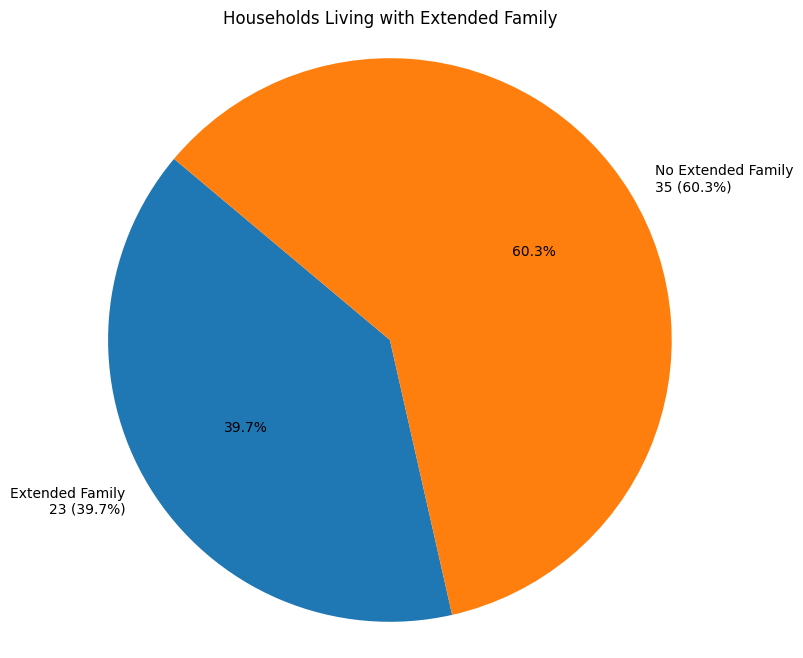

In [29]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL queries to count households living with and without extended family from 'final_sample'
query_extended_family = """
SELECT COUNT(*) AS count_extended_family
FROM final_sample
WHERE [Extended Family] = 'Yes'
"""

query_no_extended_family = """
SELECT COUNT(*) AS count_no_extended_family
FROM final_sample
WHERE [Extended Family] = 'No'
"""

# Execute the queries and fetch the results
cursor = conn.cursor()

cursor.execute(query_extended_family)
# fetch next row of query result set; if > rows available returns values of columns in that row as tuple, [0] accesses 1st element of tuple
count_extended_family = cursor.fetchone()[0]

cursor.execute(query_no_extended_family)
count_no_extended_family = cursor.fetchone()[0]

# Close the cursor and the connection
cursor.close()
conn.close()

# Calculate total count
total_count = count_extended_family + count_no_extended_family

# Calculate percentages
percent_extended_family = (count_extended_family / total_count) * 100
percent_no_extended_family = (count_no_extended_family / total_count) * 100

# Create labels for the pie chart
labels = ['Extended Family\n{} ({:.1f}%)'.format(count_extended_family, percent_extended_family),
          'No Extended Family\n{} ({:.1f}%)'.format(count_no_extended_family, percent_no_extended_family)]

# Create sizes for the pie chart
sizes = [count_extended_family, count_no_extended_family]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Households Living with Extended Family')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

###4. Students at home

a. How many households have students?

In [30]:
import sqlite3

# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to count households with students from 'final_sample'
query_students_at_home = """
SELECT COUNT(*)
FROM final_sample
WHERE [Students in Household] = 'Yes'
"""

# Execute the query and fetch the result
cursor = conn.cursor()
cursor.execute(query_students_at_home)
num_households_with_students = cursor.fetchone()[0]

# Close the cursor and the connection
cursor.close()
conn.close()

# Print the result
print("Number of households with students:", num_households_with_students)


Number of households with students: 57


In [31]:

# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to count households without students from 'final_sample'
query_students_at_home = """
SELECT COUNT(*) AS num_households_without_students
FROM final_sample
WHERE [Students in Household] = 'No'
"""

# Execute the query and fetch the result
cursor = conn.cursor()
cursor.execute(query_students_at_home)
num_households_without_students = cursor.fetchone()[0]

# Close the cursor and the connection
cursor.close()
conn.close()

# Print the count of households without students
print("Number of households without students:", num_households_without_students)


Number of households without students: 1


b. Make a pie chart from it.

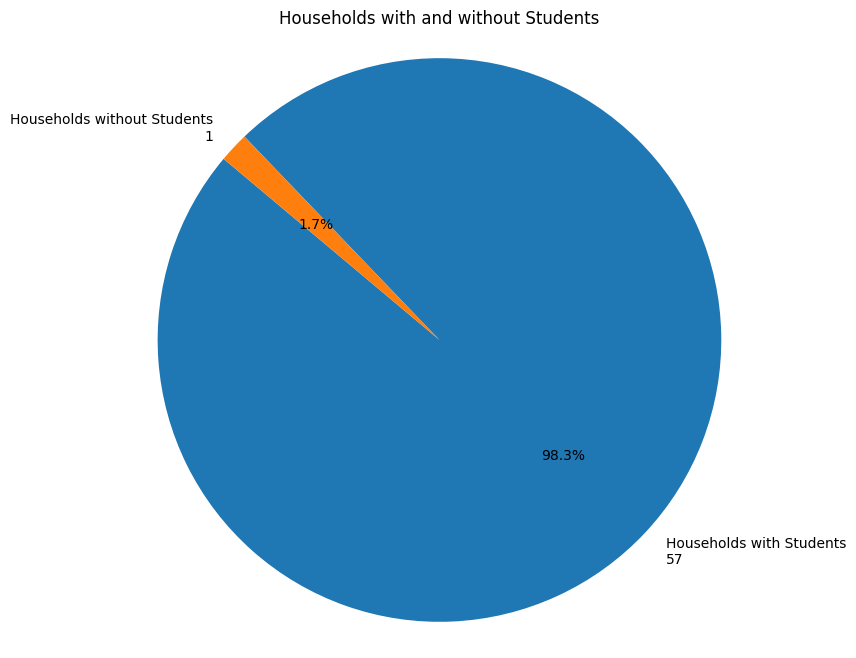

In [32]:

# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to count households with students from 'final_sample'
query_students_at_home = """
SELECT COUNT(*) AS num_households_with_students,
       (SELECT COUNT(*) FROM final_sample WHERE [Students in Household] = 'No') AS num_households_without_students
FROM final_sample
WHERE [Students in Household] = 'Yes'
"""

# Execute the query and fetch the result
cursor = conn.cursor()
cursor.execute(query_students_at_home)
result = cursor.fetchone()

# Extract the counts
num_households_with_students = result[0]
num_households_without_students = result[1]

# Close the cursor and the connection
cursor.close()
conn.close()

# Create labels for the pie chart
labels = ['Households with Students\n{}'.format(num_households_with_students),
          'Households without Students\n{}'.format(num_households_without_students)]
sizes = [num_households_with_students, num_households_without_students]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Households with and without Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


###5. AVERAGE BILL / AVERAGE BUDGET

a. How much is the average bill of the low income households? call the variable 'avg_bill_household'

In [33]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve all information from final_sample
query_final_sample = """
SELECT *
FROM final_sample;
"""

# Execute the query
final_sample_info = pd.read_sql_query(query_final_sample, conn)

# Get the column names of the final_sample_info DataFrame
columns = final_sample_info.columns

# Check if 'avg_bill' is present in the column names
if 'avg_bill' in columns:
    print("The 'avg_bill' column is present in the final_sample table.")
else:
    print("The 'avg_bill' column is not present in the final_sample table.")


The 'avg_bill' column is present in the final_sample table.


In [34]:
# Since the 'avg_bill' column is present in the 'final_sample' table, we can directly query this table to calculate the average bill of low-income households
# Define the SQL query to calculate the average bill for low-income households from the 'final_sample' table
query_avg_bill_low_income = """
SELECT AVG(avg_bill) AS avg_bill_household
FROM final_sample
"""

# Execute the query and fetch the result
cursor = conn.cursor()
cursor.execute(query_avg_bill_low_income)
avg_bill_household = cursor.fetchone()[0]

# Close the cursor
cursor.close()

# Print the average bill of low-income households
print("Average bill of low-income households:", avg_bill_household)


Average bill of low-income households: 3498.948275862069


b. How much is the average budget of the low income households? Call the variable 'avg_budget_household'.

In [35]:
# Define the SQL query to calculate the average budget for low-income households from the 'final_sample' table
query_avg_budget_low_income = """
SELECT AVG([Monthly Electric Budget]) AS avg_budget_household
FROM final_sample
"""

# Execute the query and fetch the result
cursor = conn.cursor()
cursor.execute(query_avg_budget_low_income)
avg_budget_household = cursor.fetchone()[0]

# Close the cursor
cursor.close()

# Print the average budget of low-income households
print("Average budget of low-income households:", avg_budget_household)


Average budget of low-income households: 2327.0862068965516


c. Based on the numbers, what can you conclude?

ANSWER HERE:

Low-income households spend more on bills than the allocated budget.

###6. AVERAGE BILL with students

a. What is the average bill of households with students at home? Use .groupby

```
# sample code from previous lecture

df[['Education',"Income"]].groupby("Education").mean()
```



In [36]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve all information from 'final_sample' table
query_final_sample = """
SELECT *
FROM final_sample;
"""

# Execute the query and fetch the data into a DataFrame
final_sample = pd.read_sql_query(query_final_sample, conn)

# Filter the data to include only households with students at home and where the response is 'Yes'
students_with_home_yes = final_sample[final_sample['Students in Household'] == 'Yes']

# Calculate the average bill of households with students at home using groupby
average_bill_with_students = students_with_home_yes.groupby('Students in Household')['avg_bill'].mean()

# Close the connection
conn.close()

# Print the result
print("Average bill of households with students at home:")
print(average_bill_with_students)


Average bill of households with students at home:
Students in Household
Yes    3538.368421
Name: avg_bill, dtype: float64


b. What can you conclude from the information above? Note: This is a trick question.

ANSWER HERE:

Households with students at home, despite being low-income, tend to have higher bills compared to the overall average bill of low-income households. There may be a potential additional expense(s) associated with having students at home.

###7. Struggle to find money.

a. How many households struggle to pay the bill always, very often, often, sometimes, and never?



```
.value_counts()
```



This method counts the occurrences of each unique value in the selected column. It returns a Series where the index contains the unique values from the column, and the values contain the counts of each unique value.


In [37]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve the column containing the responses
query_struggle_to_pay = """
SELECT "Struggle Paying Electric Bill"
FROM final_sample;
"""
# Count the occurrences of each response option
struggle_counts = final_sample['Struggle Paying Electric Bill'].value_counts()

# Print the counts
print("Struggle to pay bill counts:")
print(struggle_counts)


Struggle to pay bill counts:
Struggle Paying Electric Bill
Sometimes     26
Always        11
Often         10
Very Often     8
Never          3
Name: count, dtype: int64


b. Make a bar chart

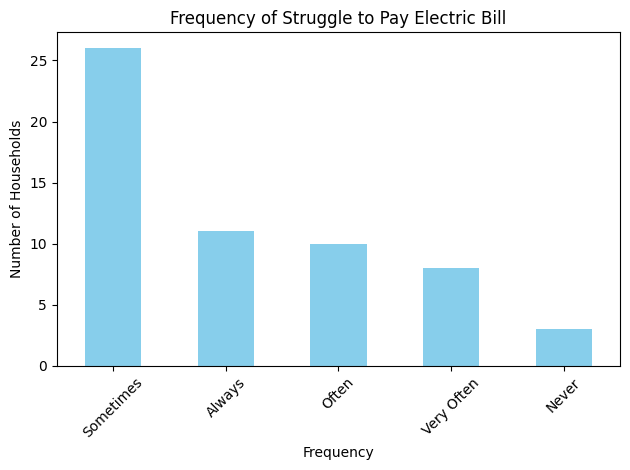

In [38]:
# Plot the bar chart
struggle_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Struggle to Pay Electric Bill')
plt.xlabel('Frequency')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


###8. Fail to pay the bill

a. How many households struggle to pay the bill always, very often, often, sometimes, and never?



```
.value_counts()
```


In [39]:
# Close the previous database connection
conn.close()


In [40]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve the column containing the responses
query_struggle_to_pay = """
SELECT "Failure Paying Electric Bill"
FROM final_sample;
"""

# Execute the SQL query and fetch the data into a DataFrame
struggle_df = pd.read_sql_query(query_struggle_to_pay, conn)

# Count the occurrences of each response option
struggle_counts = struggle_df['Failure Paying Electric Bill'].value_counts()

# Print the counts
print("Struggle to pay bill counts:")
print(struggle_counts)


Struggle to pay bill counts:
Failure Paying Electric Bill
Sometimes     31
Never         12
Often          9
Very Often     4
Always         2
Name: count, dtype: int64


b. Make a bar chart

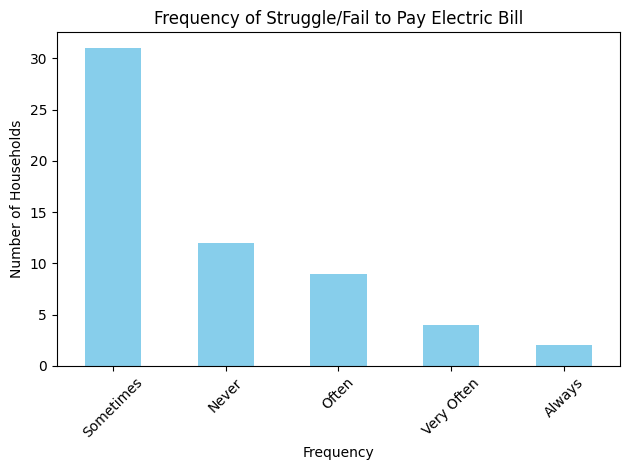

In [41]:

# Plot the bar chart
struggle_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Struggle/Fail to Pay Electric Bill')
plt.xlabel('Frequency')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [42]:

# Close the previous database connection
conn.close()

###9. You now may use SQL, or Python, whichever is more comfortable.

if you will use SQL, make sure to reconnect to the database THAT IS already in our directory. Careful with the spelling.


a. Count how many households have each of the essential appliances.

1. TV
2. Refrigerator
3. Rice Cooker
4. Washing Machine

<br>

also count how many households got the luxury of having these appliances.

1. Electric Water Dispenser
2. Air Conditioner

In [43]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve the column containing the appliance ownership information
query_appliances = """
SELECT "Owned Appliances"
FROM final_sample;
"""

# Execute the SQL query and fetch the data into a DataFrame
appliances_df = pd.read_sql_query(query_appliances, conn)

# Count the occurrences of each appliance (eg. from Owned Appliances column dataframe appliances_df string in column
# that contains "TV" true-1 false-0 then adds sum of boolean values)
tv_count = appliances_df['Owned Appliances'].str.contains('TV').sum()
refrigerator_count = appliances_df['Owned Appliances'].str.contains('Refrigerator').sum()
rice_cooker_count = appliances_df['Owned Appliances'].str.contains('Rice Cooker').sum()
washing_machine_count = appliances_df['Owned Appliances'].str.contains('Washing Machine').sum()

# Print the counts for each appliance
print("Count of households with each essential appliance:")
print("TV:", tv_count)
print("Refrigerator:", refrigerator_count)
print("Rice Cooker:", rice_cooker_count)
print("Washing Machine:", washing_machine_count)


Count of households with each essential appliance:
TV: 55
Refrigerator: 42
Rice Cooker: 33
Washing Machine: 51


In [44]:
conn.close()

In [45]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to retrieve the column containing the appliance ownership information
query_luxury_appliances = """
SELECT "Owned Appliances"
FROM final_sample;
"""

# Execute the SQL query and fetch the data into a DataFrame
luxury_appliances_df = pd.read_sql_query(query_luxury_appliances, conn)

# Count the occurrences of each luxury appliance
electric_water_dispenser_count = luxury_appliances_df['Owned Appliances'].str.contains('Electric Water Dispenser').sum()
air_conditioner_count = luxury_appliances_df['Owned Appliances'].str.contains('Air Conditioner').sum()

# Print the counts for each luxury appliance
print("Count of households with each luxury appliance:")
print("Electric Water Dispenser:", electric_water_dispenser_count)
print("Air Conditioner:", air_conditioner_count)

conn.close()


Count of households with each luxury appliance:
Electric Water Dispenser: 8
Air Conditioner: 22


###10. Remember the With_Students table? Now get the number of the students in low income households who has at least a laptop or desktop computer.

In [46]:
# Reconnect to the SQLite database
conn = sqlite3.connect('Survey_Database.db')

# Define the SQL query to count the number of students in low-income households
# with at least a laptop or desktop computer
query_num_students_with_computer = """
SELECT COUNT(*) AS num_students_with_computer
FROM With_Students
WHERE [Students in Household] = 'Yes'
AND [Monthly Household Salary] LIKE 'Less than Php 21,194%'
AND ("Electronics Owned" LIKE '%Laptop%' OR
     "Electronics Owned" LIKE '%Desktop%');
"""

# Execute the SQL query and fetch the result
cursor = conn.cursor()
cursor.execute(query_num_students_with_computer)
num_students_with_computer = cursor.fetchone()[0]

# Close the cursor and the connection
cursor.close()
conn.close()

# Print the number of students in low-income households with at least a laptop or desktop computer
print("Number of students in low-income households with computer/laptop:", num_students_with_computer)
conn.close()

Number of students in low-income households with computer/laptop: 43
